# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [5]:
# Load and check the dataset

from google.colab import drive
import pandas as pd

# Connect to Google Drive
drive.mount('/content/drive')

# Specify the dataset path
dataset_path = '/content/drive/My Drive/BTS_short_100.csv'

# Load the dataset
df = pd.read_csv(dataset_path, encoding="UTF-8")

# Show the first few rows of the dataset
df.head(10)

Mounted at /content/drive


story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
2   4706144            2015   1185  249.0       1.0   
3   4621698            2015   1016  105.0       4.0   
4   4752980            2015   1164   79.0       NaN   
5   3651108            2015   1174  339.0       6.0   
6   4621698            2015   1016  105.0       4.0   
7   5282729            2015   1173   17.0       NaN   
8   5533886            2015   1086  553.0       8.0   
9   4547622            2015   1094   15.0       2.0   

                                       story_content  
0  library snacks & 3AM promises\n\nAuthor's Note...  
1  Worry\n\nYou stumbled through the apartment do...  
2  library snacks & 3AM promises\n\nAuthor's Note...  
3  Mornings\n\nThis is literally trash omg what I...  
4  Worry\n\nYou stumbled through the apartment do...  
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...  
6  Mornings\n\nThis is literally trash omg what I...  
7  Unspoken Words\n\nYou come back into the flat,...  
8  Scenic World\n\nAuthor's Note:\n\nUn beta'd, m...  
9  Um.\n\nAuthor's Note:\n\nI think I wrote this ...

Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [6]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       NaN   

                                       story_content  
0  library snacks & 3AM promises\n\nAuthor's Note...  
1  Worry\n\nYou stumbled through the apartment do...  
3  Mornings\n\nThis is literally trash omg what I...  
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...  
7  Unspoken Words\n\nYou come back into the flat,...

In [8]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [9]:
# H0 (answer in words):
# Low levels of masculinity in male characters do not significantly affect fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


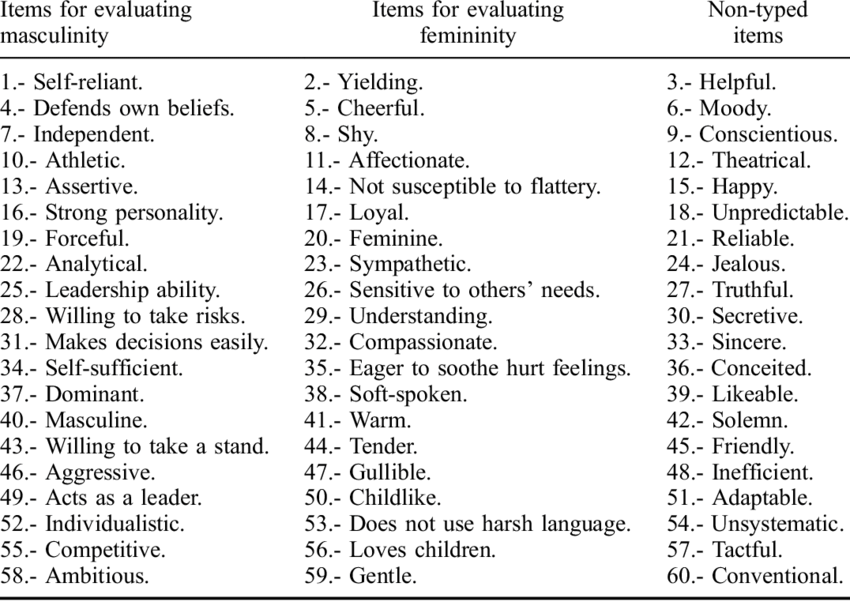

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [10]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [11]:
! git clone https://github.com/maartensap/riveter-nlp.git

Cloning into 'riveter-nlp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 610 (delta 141), reused 164 (delta 109), pack-reused 392
Receiving objects: 100% (610/610), 5.24 MiB | 22.07 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [12]:
%ls

drive/  riveter-nlp/  sample_data/


In [13]:
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 7.4 MB/s eta 0:00:00


In [14]:
!pip install --upgrade spacy
# This will downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 941.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [15]:
!python -m spacy validate

2024-03-15 09:00:11.231615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 09:00:11.231763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 09:00:11.395232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 09:00:11.710225: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 09:00:14.511791: W tensorflow/compiler/tf2

In [16]:
!python -m spacy download en_core_web_sm

2024-03-15 09:00:31.859549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 09:00:31.859641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 09:00:31.861319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 09:00:31.870292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 09:00:33.317739: W tensorflow/compiler/tf2

In [17]:
!pip install seaborn

Now we have prepared all the dependencies needed.

In [18]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Navigate to the directory containing the riveter module
%cd /content/gdrive/MyDrive/riveter

# Now import the Riveter module
from riveter import Riveter

Mounted at /content/gdrive
/content/gdrive/MyDrive/riveter


In [19]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [20]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [21]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

riveter = Riveter()
riveter.load_sap_lexicon('power')

# Create an empty dictionary 'scores_dict'
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [22]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

  # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    # Define patterns for male pronouns
    riveter.train(segments, text_ids, num_bootstraps=20, persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:35<53:03, 35.77s/it]

2024-03-15 09:03:28 Complete!
Story ID: 4706144, Masculine Power Score: 0.0863355078983555



Processing stories:   2%|▏         | 2/90 [01:07<48:33, 33.11s/it]

2024-03-15 09:03:59 Complete!
Story ID: 4752980, Masculine Power Score: 0.3185420536976876



Processing stories:   3%|▎         | 3/90 [01:35<44:59, 31.03s/it]

2024-03-15 09:04:28 Complete!
Story ID: 4621698, Masculine Power Score: 0.5853968253968254



Processing stories:   4%|▍         | 4/90 [02:07<45:04, 31.45s/it]

2024-03-15 09:05:00 Complete!
Story ID: 3651108, Masculine Power Score: 0.11233504235102701



Processing stories:   6%|▌         | 5/90 [02:45<47:37, 33.62s/it]

2024-03-15 09:05:38 Complete!
Story ID: 5282729, Masculine Power Score: 0.21522129319955408



Processing stories:   7%|▋         | 6/90 [03:20<48:07, 34.37s/it]

2024-03-15 09:06:13 Complete!
Story ID: 5533886, Masculine Power Score: -0.0033465608465608463



Processing stories:   8%|▊         | 7/90 [03:54<47:14, 34.15s/it]

2024-03-15 09:06:47 Complete!
Story ID: 4547622, Masculine Power Score: 0.06022850466546916



Processing stories:   9%|▉         | 8/90 [04:22<44:04, 32.25s/it]

2024-03-15 09:07:15 Complete!
Story ID: 16177508, Masculine Power Score: 0.15003423788364573



Processing stories:  10%|█         | 9/90 [04:55<43:49, 32.46s/it]

2024-03-15 09:07:48 Complete!
Story ID: 15745185, Masculine Power Score: -0.1233531780344593



 33%|███▎      | 1/3 [00:15<00:31, 15.74s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [05:27<43:06, 32.33s/it]

2024-03-15 09:08:20 Complete!
Story ID: 15654528, Masculine Power Score: 0.1884167756359321



Processing stories:  12%|█▏        | 11/90 [05:57<41:41, 31.67s/it]

2024-03-15 09:08:50 Complete!
Story ID: 7448155, Masculine Power Score: 0.3154908748457664



Processing stories:  13%|█▎        | 12/90 [06:30<41:39, 32.04s/it]

2024-03-15 09:09:23 Complete!
Story ID: 4983847, Masculine Power Score: 0.09775133178716268



Processing stories:  14%|█▍        | 13/90 [07:04<41:47, 32.56s/it]

2024-03-15 09:09:57 Complete!
Story ID: 3313118, Masculine Power Score: -0.2371769715791455



Processing stories:  16%|█▌        | 14/90 [07:36<41:08, 32.49s/it]

2024-03-15 09:10:29 Complete!
Story ID: 3290390, Masculine Power Score: -0.09244559915506356



Processing stories:  17%|█▋        | 15/90 [08:13<42:07, 33.70s/it]

2024-03-15 09:11:06 Complete!
Story ID: 36435301, Masculine Power Score: 0.04685886810499813



Processing stories:  18%|█▊        | 16/90 [08:44<40:36, 32.92s/it]

2024-03-15 09:11:37 Complete!
Story ID: 36575491, Masculine Power Score: 0.25631771089580485



Processing stories:  19%|█▉        | 17/90 [09:15<39:28, 32.44s/it]

2024-03-15 09:12:08 Complete!
Story ID: 35225224, Masculine Power Score: 0.24191535737251849



Processing stories:  20%|██        | 18/90 [09:47<38:33, 32.13s/it]

2024-03-15 09:12:40 Complete!
Story ID: 4594527, Masculine Power Score: 0.15496656121656122



Processing stories:  21%|██        | 19/90 [10:15<36:45, 31.07s/it]

2024-03-15 09:13:08 Complete!
Story ID: 5485625, Masculine Power Score: 0.12206896551724133



Processing stories:  22%|██▏       | 20/90 [10:47<36:23, 31.19s/it]

2024-03-15 09:13:40 Complete!
Story ID: 36408319, Masculine Power Score: 0.10210034891149443



Processing stories:  23%|██▎       | 21/90 [11:22<37:14, 32.38s/it]

2024-03-15 09:14:15 Complete!
Story ID: 35762659, Masculine Power Score: 0.21197490808797492



Processing stories:  24%|██▍       | 22/90 [11:56<37:24, 33.00s/it]

2024-03-15 09:14:49 Complete!
Story ID: 35603194, Masculine Power Score: 0.36138276726298496



Processing stories:  26%|██▌       | 23/90 [12:29<36:31, 32.71s/it]

2024-03-15 09:15:21 Complete!
Story ID: 35344306, Masculine Power Score: 0.1184290094205892



Processing stories:  27%|██▋       | 24/90 [13:02<36:15, 32.96s/it]

2024-03-15 09:15:55 Complete!
Story ID: 36695155, Masculine Power Score: 0.11166666666666666



Processing stories:  28%|██▊       | 25/90 [13:36<35:57, 33.19s/it]

2024-03-15 09:16:29 Complete!
Story ID: 36064474, Masculine Power Score: 0.12340517979266996



Processing stories:  29%|██▉       | 26/90 [14:10<35:36, 33.39s/it]

2024-03-15 09:17:03 Complete!
Story ID: 36024820, Masculine Power Score: 0.15693374109575942



Processing stories:  30%|███       | 27/90 [14:48<36:32, 34.81s/it]

2024-03-15 09:17:41 Complete!
Story ID: 35182330, Masculine Power Score: 0.07278636321331419



Processing stories:  31%|███       | 28/90 [15:22<35:55, 34.77s/it]

2024-03-15 09:18:15 Complete!
Story ID: 36567496, Masculine Power Score: 0.21609297134080124



Processing stories:  32%|███▏      | 29/90 [15:56<35:06, 34.54s/it]

2024-03-15 09:18:49 Complete!
Story ID: 35560330, Masculine Power Score: 0.17018118264254853



Processing stories:  33%|███▎      | 30/90 [16:31<34:41, 34.69s/it]

2024-03-15 09:19:24 Complete!
Story ID: 35877496, Masculine Power Score: 0.1375880687730511



Processing stories:  34%|███▍      | 31/90 [17:05<33:47, 34.36s/it]

2024-03-15 09:19:58 Complete!
Story ID: 35957410, Masculine Power Score: 0.29436270162585954



Processing stories:  36%|███▌      | 32/90 [17:38<32:49, 33.95s/it]

2024-03-15 09:20:31 Complete!
Story ID: 30947654, Masculine Power Score: 0.07064259787399534



 33%|███▎      | 1/3 [00:15<00:30, 15.46s/it]

Processing stories:  37%|███▋      | 33/90 [18:11<31:58, 33.66s/it]

2024-03-15 09:21:04 Complete!
Story ID: 36332707, Masculine Power Score: -0.10969329538926513



Processing stories:  38%|███▊      | 34/90 [18:48<32:14, 34.54s/it]

2024-03-15 09:21:41 Complete!
Story ID: 35967940, Masculine Power Score: 0.17919347388586626



Processing stories:  39%|███▉      | 35/90 [19:23<31:51, 34.75s/it]

2024-03-15 09:22:16 Complete!
Story ID: 35001073, Masculine Power Score: 0.045819180819180814



Processing stories:  40%|████      | 36/90 [19:58<31:25, 34.92s/it]

2024-03-15 09:22:51 Complete!
Story ID: 35138911, Masculine Power Score: 0.1300482808993502



Processing stories:  41%|████      | 37/90 [20:28<29:25, 33.31s/it]

2024-03-15 09:23:21 Complete!
Story ID: 35280397, Masculine Power Score: 0.2428435007974481



Processing stories:  42%|████▏     | 38/90 [21:06<30:16, 34.93s/it]

2024-03-15 09:23:59 Complete!
Story ID: 36049939, Masculine Power Score: 0.3943178650662915



Processing stories:  43%|████▎     | 39/90 [21:44<30:20, 35.69s/it]

2024-03-15 09:24:37 Complete!
Story ID: 34995673, Masculine Power Score: 0.17033679374368937



Processing stories:  44%|████▍     | 40/90 [22:23<30:29, 36.60s/it]

2024-03-15 09:25:16 Complete!
Story ID: 33477346, Masculine Power Score: 0.43719551282051283



Processing stories:  46%|████▌     | 41/90 [22:54<28:38, 35.07s/it]

2024-03-15 09:25:47 Complete!
Story ID: 36840832, Masculine Power Score: -0.21366529669161247



Processing stories:  47%|████▋     | 42/90 [23:29<28:01, 35.04s/it]

2024-03-15 09:26:22 Complete!
Story ID: 30896276, Masculine Power Score: 0.1667857142857143



Processing stories:  48%|████▊     | 43/90 [23:59<26:08, 33.37s/it]

2024-03-15 09:26:52 Complete!
Story ID: 37363471, Masculine Power Score: 0.42875370243791294



Processing stories:  49%|████▉     | 44/90 [24:29<24:56, 32.53s/it]

2024-03-15 09:27:22 Complete!
Story ID: 36984901, Masculine Power Score: 0.13049110491565732



Processing stories:  50%|█████     | 45/90 [25:03<24:44, 32.98s/it]

2024-03-15 09:27:56 Complete!
Story ID: 33353644, Masculine Power Score: 0.009508807877287346



Processing stories:  51%|█████     | 46/90 [25:35<23:49, 32.49s/it]

2024-03-15 09:28:28 Complete!
Story ID: 37002835, Masculine Power Score: -0.12839133089133087



Processing stories:  52%|█████▏    | 47/90 [26:05<22:44, 31.74s/it]

2024-03-15 09:28:57 Complete!
Story ID: 5630824, Masculine Power Score: 0.3177387914230019



Processing stories:  53%|█████▎    | 48/90 [26:39<22:41, 32.42s/it]

2024-03-15 09:29:31 Complete!
Story ID: 10053617, Masculine Power Score: 0.18898713980389947



Processing stories:  54%|█████▍    | 49/90 [27:10<22:00, 32.21s/it]

2024-03-15 09:30:03 Complete!
Story ID: 1572659, Masculine Power Score: 0.2493393493761141



Processing stories:  56%|█████▌    | 50/90 [27:44<21:50, 32.76s/it]

2024-03-15 09:30:37 Complete!
Story ID: 7450573, Masculine Power Score: 0.16148402680910423



Processing stories:  57%|█████▋    | 51/90 [28:21<21:58, 33.81s/it]

2024-03-15 09:31:14 Complete!
Story ID: 6918676, Masculine Power Score: 0.034039153325682754



Processing stories:  58%|█████▊    | 52/90 [28:58<22:11, 35.04s/it]

2024-03-15 09:31:51 Complete!
Story ID: 6075402, Masculine Power Score: 0.35823610777421844



Processing stories:  59%|█████▉    | 53/90 [29:34<21:43, 35.22s/it]

2024-03-15 09:32:27 Complete!
Story ID: 11101779, Masculine Power Score: 0.3355504144977829



Processing stories:  60%|██████    | 54/90 [30:11<21:26, 35.75s/it]

2024-03-15 09:33:04 Complete!
Story ID: 11321331, Masculine Power Score: 0.11111831367222225



Processing stories:  61%|██████    | 55/90 [30:43<20:06, 34.46s/it]

2024-03-15 09:33:35 Complete!
Story ID: 12284853, Masculine Power Score: 0.16966889911512337



Processing stories:  62%|██████▏   | 56/90 [31:14<18:58, 33.50s/it]

2024-03-15 09:34:07 Complete!
Story ID: 12282003, Masculine Power Score: 0.08973251791450457



Processing stories:  63%|██████▎   | 57/90 [31:43<17:41, 32.18s/it]

2024-03-15 09:34:36 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [32:15<17:13, 32.30s/it]

2024-03-15 09:35:08 Complete!
Story ID: 4228053, Masculine Power Score: 0.215434904176509



Processing stories:  66%|██████▌   | 59/90 [32:49<16:54, 32.72s/it]

2024-03-15 09:35:42 Complete!
Story ID: 12127317, Masculine Power Score: 0.1258767084824451



Processing stories:  67%|██████▋   | 60/90 [33:17<15:41, 31.40s/it]

2024-03-15 09:36:10 Complete!
Story ID: 12010134, Masculine Power Score: 0.23126637798868244



Processing stories:  68%|██████▊   | 61/90 [33:53<15:50, 32.78s/it]

2024-03-15 09:36:46 Complete!
Story ID: 11510919, Masculine Power Score: 0.44867220922823636



Processing stories:  69%|██████▉   | 62/90 [34:26<15:18, 32.80s/it]

2024-03-15 09:37:19 Complete!
Story ID: 8145802, Masculine Power Score: 0.21864883233672114



Processing stories:  70%|███████   | 63/90 [34:58<14:36, 32.46s/it]

2024-03-15 09:37:51 Complete!
Story ID: 6637942, Masculine Power Score: -0.1575533282534982



Processing stories:  71%|███████   | 64/90 [35:30<13:59, 32.30s/it]

2024-03-15 09:38:23 Complete!
Story ID: 7427905, Masculine Power Score: -0.026670199611376077



Processing stories:  72%|███████▏  | 65/90 [36:02<13:28, 32.36s/it]

2024-03-15 09:38:55 Complete!
Story ID: 3893857, Masculine Power Score: 0.13295949606141336



Processing stories:  73%|███████▎  | 66/90 [36:34<12:50, 32.12s/it]

2024-03-15 09:39:27 Complete!
Story ID: 33040258, Masculine Power Score: 0.2265079365079365



Processing stories:  74%|███████▍  | 67/90 [37:10<12:47, 33.36s/it]

2024-03-15 09:40:03 Complete!
Story ID: 33858850, Masculine Power Score: -0.16782227824539486



Processing stories:  76%|███████▌  | 68/90 [37:46<12:26, 33.95s/it]

2024-03-15 09:40:39 Complete!
Story ID: 2775776, Masculine Power Score: 0.25177128427128426



Processing stories:  77%|███████▋  | 69/90 [38:20<11:53, 33.99s/it]

2024-03-15 09:41:13 Complete!
Story ID: 3197963, Masculine Power Score: 0.3352350427350427



Processing stories:  78%|███████▊  | 70/90 [38:52<11:10, 33.54s/it]

2024-03-15 09:41:45 Complete!
Story ID: 12395199, Masculine Power Score: 0.15098582556807777



Processing stories:  79%|███████▉  | 71/90 [39:25<10:32, 33.28s/it]

2024-03-15 09:42:18 Complete!
Story ID: 10934010, Masculine Power Score: 0.24988451363451367



Processing stories:  80%|████████  | 72/90 [39:55<09:41, 32.30s/it]

2024-03-15 09:42:48 Complete!
Story ID: 12301116, Masculine Power Score: 0.004670790276183068



Processing stories:  81%|████████  | 73/90 [40:27<09:08, 32.25s/it]

2024-03-15 09:43:20 Complete!
Story ID: 12706317, Masculine Power Score: -0.11251424438990183



Processing stories:  82%|████████▏ | 74/90 [41:03<08:55, 33.47s/it]

2024-03-15 09:43:56 Complete!
Story ID: 11499468, Masculine Power Score: 0.1289830468063227



Processing stories:  83%|████████▎ | 75/90 [41:33<08:06, 32.45s/it]

2024-03-15 09:44:26 Complete!
Story ID: 12184146, Masculine Power Score: 0.31617877354677015



Processing stories:  84%|████████▍ | 76/90 [42:04<07:26, 31.87s/it]

2024-03-15 09:44:57 Complete!
Story ID: 12201333, Masculine Power Score: 0.11364777396369688



Processing stories:  86%|████████▌ | 77/90 [42:41<07:13, 33.34s/it]

2024-03-15 09:45:34 Complete!
Story ID: 11496030, Masculine Power Score: -0.022639222044995903



Processing stories:  87%|████████▋ | 78/90 [43:15<06:43, 33.60s/it]

2024-03-15 09:46:08 Complete!
Story ID: 11510277, Masculine Power Score: 0.25738239834576376



Processing stories:  88%|████████▊ | 79/90 [43:50<06:16, 34.19s/it]

2024-03-15 09:46:43 Complete!
Story ID: 10772274, Masculine Power Score: 0.43849909248324587



Processing stories:  89%|████████▉ | 80/90 [44:24<05:38, 33.88s/it]

2024-03-15 09:47:17 Complete!
Story ID: 12646050, Masculine Power Score: 0.033219127363864204



Processing stories:  90%|█████████ | 81/90 [44:54<04:56, 33.00s/it]

2024-03-15 09:47:47 Complete!
Story ID: 11161479, Masculine Power Score: -0.01717141195247497



Processing stories:  91%|█████████ | 82/90 [45:25<04:18, 32.29s/it]

2024-03-15 09:48:18 Complete!
Story ID: 12069936, Masculine Power Score: 0.04081922228350799



Processing stories:  92%|█████████▏| 83/90 [45:59<03:49, 32.78s/it]

2024-03-15 09:48:52 Complete!
Story ID: 12285972, Masculine Power Score: 0.3979654818028312



Processing stories:  93%|█████████▎| 84/90 [46:29<03:11, 31.97s/it]

2024-03-15 09:49:22 Complete!
Story ID: 12372702, Masculine Power Score: -0.03698030537336248



Processing stories:  94%|█████████▍| 85/90 [47:03<02:43, 32.66s/it]

2024-03-15 09:49:56 Complete!
Story ID: 12610496, Masculine Power Score: 0.08444064218103715



Processing stories:  96%|█████████▌| 86/90 [47:38<02:13, 33.27s/it]

2024-03-15 09:50:31 Complete!
Story ID: 10970472, Masculine Power Score: 0.07661435786435786



Processing stories:  97%|█████████▋| 87/90 [48:07<01:36, 32.05s/it]

2024-03-15 09:51:00 Complete!
Story ID: 12084552, Masculine Power Score: 0.34388534467481835



Processing stories:  98%|█████████▊| 88/90 [48:45<01:07, 33.68s/it]

2024-03-15 09:51:38 Complete!
Story ID: 12727119, Masculine Power Score: -0.0491964954748557



Processing stories:  99%|█████████▉| 89/90 [49:16<00:32, 32.80s/it]

2024-03-15 09:52:08 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [49:47<00:00, 33.19s/it]

2024-03-15 09:52:40 Complete!
Story ID: 10859508, Masculine Power Score: 0.24458756104334242


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [23]:
# Q2 (code)
# Sample 5 rows from the dataframe
sample = df.sample(n=5)

# Print the sample
print(sample)

    story_id  published_year  words  kudos  comments  \
49  33477346            2021   1194    8.0       NaN   
76  33858850            2021   1145   22.0       4.0   
28  36408319            2022   1011   17.0       8.0   
17   3313118            2015   1099   82.0       2.0   
57  10053617            2017   1110   43.0       9.0   

                                        story_content  masculine_power_score  
49  꼭 안아줄게 (hold me tight)\n\nAuthor's Note:\n\nIn...               0.437196  
76  atelier ✧\n\nSummary for the Chapter:\n\nIn wh...              -0.167822  
28  for the love (hate) of namjoon\n\n“So, you lik...               0.102100  
17  Only You\n\nAuthor's Note:\n\nwritten by r\n\n...              -0.237177  
57  Label\n\nAuthor's Note:\n\nJust based on a spe...               0.188987  


In [24]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [25]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=79433e7df3547cee6cc2831173fe89e1e4ee443062a9b44539268c5f4c76f3f3
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [26]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       NaN   

                                       story_content  masculine_power_score  \
0  library snacks & 3AM promises\n\nAuthor's Note...               0.086336   
1  Worry\n\nYou stumbled through the apartment do...               0.318542   
3  Mornings\n\nThis is literally trash omg what I...               0.585397   
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...               0.112335   
7  Unspoken Words\n\nYou come back into the flat,...               0.215221   

   lexical_richness  
0          0.428571  
1          0.400665  
3          0.428986  
5          0.412295  
7          0.376110

Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


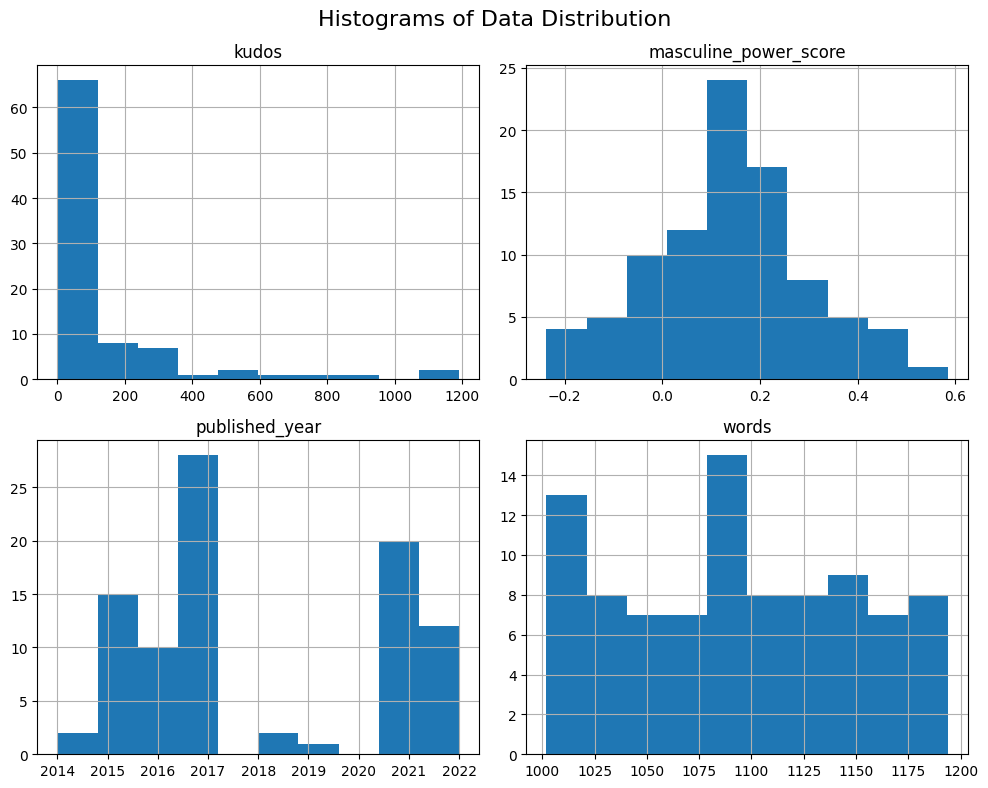


Summary Statistics:
             kudos  masculine_power_score  published_year        words
count    89.000000              90.000000       90.000000    90.000000
mean    135.393258               0.144668     2018.088889  1094.344444
std     229.972311               0.160681        2.612177    55.327048
min       1.000000              -0.237177     2014.000000  1002.000000
25%      20.000000               0.046079     2016.000000  1042.250000
50%      54.000000               0.135274     2017.000000  1095.000000
75%     122.000000               0.244152     2021.000000  1141.750000
max    1190.000000               0.585397     2022.000000  1194.000000


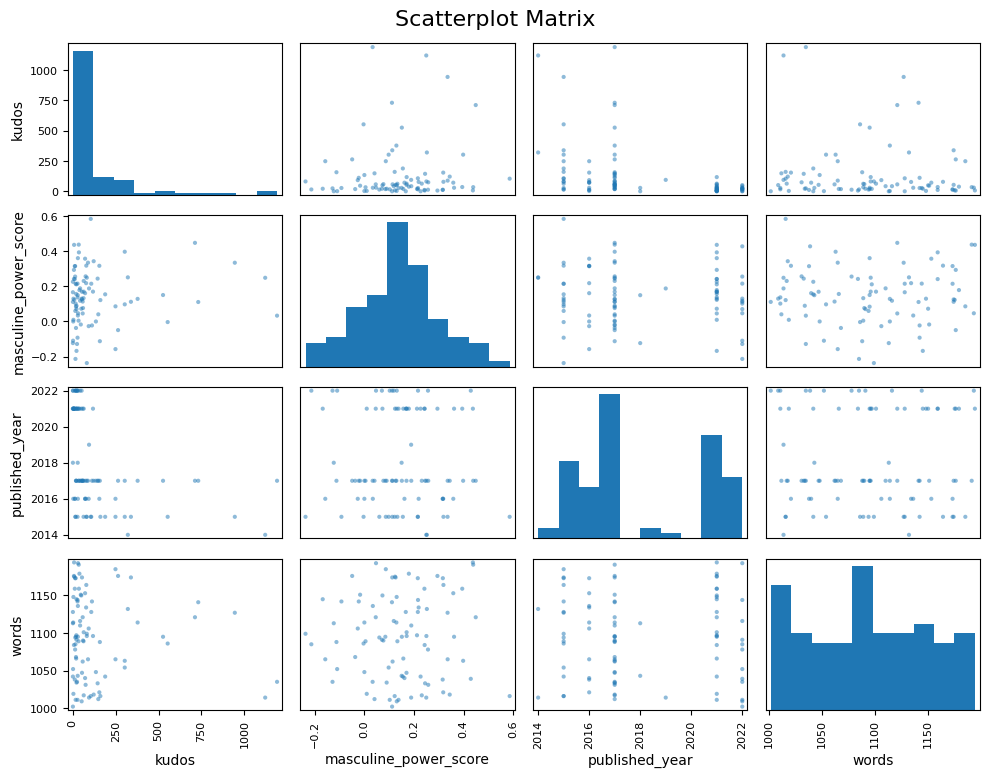

In [29]:
# Q3a (code): Check data distribution

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def plot_histograms_and_summary_stats(df):
    # Check the data distribution using histograms
    df[['kudos', 'masculine_power_score', 'published_year', 'words']].hist(figsize=(10, 8))
    plt.suptitle('Histograms of Data Distribution', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics
    summary_stats = df[['kudos', 'masculine_power_score', 'published_year', 'words']].describe()
    print("\nSummary Statistics:")
    print(summary_stats)

def plot_scatterplot_matrix(df):
    # Create a scatterplot matrix
    scatter_matrix(df[['kudos', 'masculine_power_score', 'published_year', 'words']], figsize=(10, 8))
    plt.suptitle('Scatterplot Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call functions to plot histograms, calculate summary statistics, and draw a scatterplot matrix.
plot_histograms_and_summary_stats(df)
plot_scatterplot_matrix(df)

In [30]:
# Q3a(brief summary):

# kudos: The mean number of kudos is approximately 135.39, with a wide range of values indicated by the standard deviation of 229.97. The data is right-skewed with the minimum value being 1 and the maximum value being 1190.
# The median (50th percentile) is 54, suggesting that most observations have relatively low kudos counts.

# masculine_power_score: The mean masculine power score is approximately 0.14, with a standard deviation of 0.16. The data appears to be approximately normally distributed, with values ranging from -0.24 to 0.59.

# published_year: The mean publication year is approximately 2018.09, with a standard deviation of 2.61. The data is relatively evenly distributed between 2014 and 2022, with no significant skewness observed.

# words: The mean number of words is approximately 1094.34, with a standard deviation of 55.33. The data appears to be approximately normally distributed, with values ranging from 1002 to 1194.

In [31]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics
descriptive_stats = df.describe()

# Display descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
           story_id  published_year        words        kudos   comments  \
count  9.000000e+01       90.000000    90.000000    89.000000  65.000000   
mean   1.839576e+07     2018.088889  1094.344444   135.393258   6.923077   
std    1.307922e+07        2.612177    55.327048   229.972311   7.005149   
min    1.572659e+06     2014.000000  1002.000000     1.000000   1.000000   
25%    7.448760e+06     2016.000000  1042.250000    20.000000   2.000000   
50%    1.224167e+07     2017.000000  1095.000000    54.000000   5.000000   
75%    3.517148e+07     2021.000000  1141.750000   122.000000   9.000000   
max    3.736347e+07     2022.000000  1194.000000  1190.000000  36.000000   

       masculine_power_score  lexical_richness  
count              90.000000         90.000000  
mean                0.144668          0.405027  
std                 0.160681          0.037109  
min                -0.237177          0.264443  
25%                 0.046079          0.384458

In [32]:
# Q3c (code): Check for any missing values

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

Missing Values:
story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64


In [33]:
# Q3d (code): replace all the NA values with zeros and check again Q3c

# Replace NaN values with zeros
df.fillna(0, inplace=True)

# Check for missing values again
missing_values_after_fillna = df.isnull().sum()

# Display missing values after filling with zeros
print("Missing Values after filling with zeros:")
print(missing_values_after_fillna)

Missing Values after filling with zeros:
story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

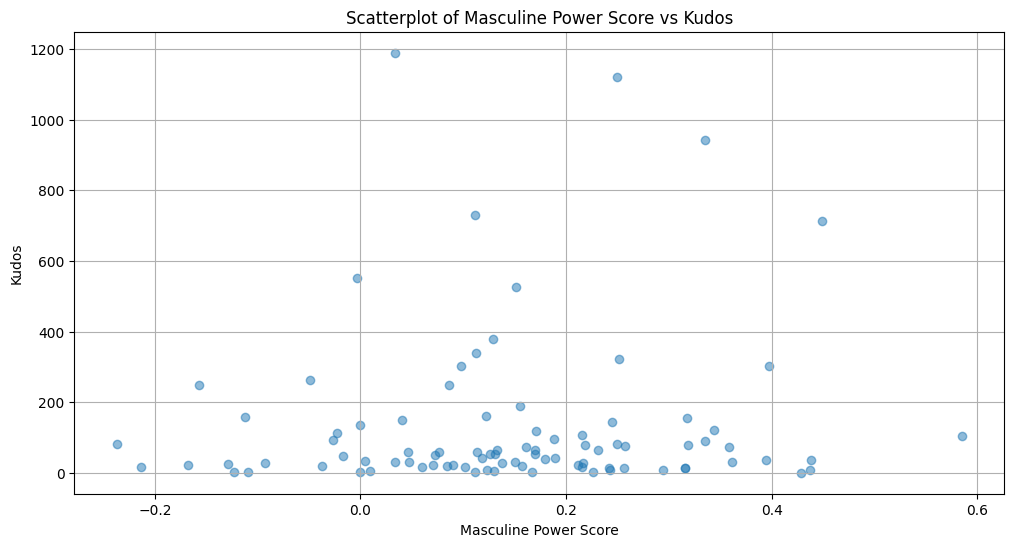

In [34]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

import matplotlib.pyplot as plt

# Create a scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Scatterplot of Masculine Power Score vs Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

**Q5. Multiple Regression and Analysis**

In [41]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = df[['masculine_power_score','published_year','words']]  # Add independent variables here
y = df['kudos']

# Add a constant to the independent variables (required for the intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression result summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.696
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00132
Time:                        10:25:16   Log-Likelihood:                -608.13
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.004e+

**Q6. Interpret the results of the regression analysis**

In [42]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

# R-squared: In this model, R-squared is 0.166, indicating that approximately 16.6% of the variance in kudos can be explained by the independent variables masculine_power_score, published_year, and words.

# Adjusted R-squared: In this model, the adjusted R-squared is 0.137, which is slightly lower than the R-squared. This is a normal phenomenon.
# It suggests that the inclusion of the independent variables may not significantly improve the model's explanatory power after accounting for the number of variables included.

# Overall, both R-squared and adjusted R-squared indicate that the independent variables in the model have limited explanatory power for the variation in kudos.
# The relatively low values suggest that other factors not included in the model may also influence kudos.

In [43]:
# Q6b (words): Interpret F-test result

# The F-statistic compares the variance explained by the model to the variance not explained in order to assess the overall significance of the model.
# The corresponding p-value in this instance is 0.00132, and the F-statistic is 5.696.
# Rejecting the null hypothesis means that the model as a whole is statistically significant when compared to a model without any predictors because the p-value is less than the significance level(usually 0.05).
# This indicates that at least one of the model's predictors has a coefficient that is not zero.

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

# Constant (const): The constant term (7.00e+04) is statistically significant (p-value < 0.001), indicating that this is the base number of kudos when all other variables are held constant.
# Masculine Power Score (masculine_power_score): The coefficient of 88.6366, with a wide confidence interval (-190.809 to 368.082), is not statistically significant (p-value 0.530). This suggests that the masculine power score has no discernible effect on the total number of kudos in the provided dataset.
# Published Year (published_year): A statistically significant (p-value < 0.001) coefficient of -34.4749 indicates that stories that have been published more recently typically have fewer kudos.
# Words: The coefficient of -0.3127 indicates that the number of words has no discernible impact on the number of kudos, but it is not statistically significant (p-value 0.445).

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

In [44]:
# Description of the results of the regression analysis

# There are some slight differences between the running results of Q5 and the OLS regression results mentioned above, which are briefly explained as follows.
# When training this model, the researchers found that the same code was run multiple times with small changes in the results, indicating that the data set and the model were running in alignment, so the results were different almost every time.
# However, through comparative analysis, these differences are not significant and will not affect the analysis of the results. Therefore, the results of the last run were retained in this study. Specific analysis has been given in Q6.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [46]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from scipy import stats

# Calculate residuals
residuals = model.resid

# Do Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print Shapiro-Wilk test results
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Results:
Test Statistic: 0.6990606784820557
p-value: 2.7393896612909474e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:

# In this analysis, the Shapiro-Wilk test statistic is calculated to be 0.699 and the associated p-value is approximately 2.74e-12.
# With such a low p-value (much smaller than the typical significance level of 0.05), we reject the null hypothesis that the data is normally distributed.   This indicates strong evidence against the assumption of normality for the dataset.
# Therefore, we can conclude that the data significantly deviates from a normal distribution.
# This implies that statistical analyses or modeling techniques that assume normality may not be appropriate for this dataset.  Alternative methods or transformations may need to be considered to address the non-normality of the data.

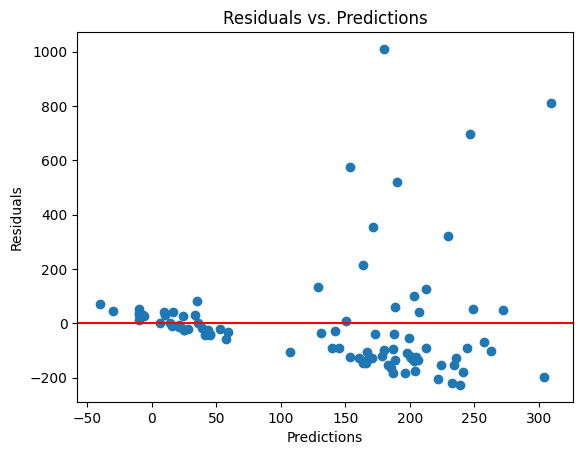

In [47]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

# Get predictions from the model
predictions = model.predict()

# Plot residuals against predictions
plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

# The provided plot depicts residuals plotted against predicted values, a standard method for homoscedasticity evaluation in regression analysis.  Homoscedasticity entails constant residual variances across all prediction levels, indicating consistent spread throughout.
# Following a plot analysis, the following conclusions about the homoscedasticity condition can be made:
# Spread of Residuals: The observed plot reveals a widening spread of residuals with increasing predicted values, suggesting heteroscedasticity—a deviation from the assumption of constant variance.
# Trends: A discernible funnel shape in the plot indicates increasing residual dispersion as predicted values rise, further indicating heteroscedasticity.
# Outliers: The presence of outliers, especially for higher predicted values, raises concerns regarding their potential impact on the regression analysis and their contribution to heteroscedasticity.
# Thus, the analysis indicates potential violation of the homoscedasticity assumption in the regression model, as evidenced by observed patterns and outliers in the residuals-versus-predicted-values scatterplot.

**Q8: Multicollinearity**

In [48]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print("VIF Results:")
print(vif)

VIF Results:
                Features     VIF Factor
0                  const  604921.241826
1  masculine_power_score       1.001842
2         published_year       1.001515
3                  words       1.000326


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:

# The Variance Inflation Factor (VIF) results indicate that the predictors, including 'masculine_power_score', 'lexical_richness', and 'published_year', exhibit low levels of multicollinearity, as their VIF values are close to 1. This suggests that these predictors do not significantly correlate with each other.
# However, the exceptionally high VIF for the constant term raises concerns. A VIF value of 604,921 suggests severe multicollinearity issues, which could lead to numerical instability in the regression model.
# This anomaly may stem from large scale differences between predictors or multicollinearity problems not adequately captured by conventional VIF calculations.
# In summary, while the primary predictors exhibit low multicollinearity, the extremely high VIF for the constant term indicates potential numerical instability in the model, necessitating further investigation and potential remedial actions.

**Q9: Reflection**

In [50]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?

# Discussion of Limitations: It's critical to recognize the analysis's limitations, including the particular dataset that was used, any potential biases, and the assumptions that were made during modeling.  An in-depth comprehension of the study results would be possible by talking about these constraints.
# Model Improvement Suggestions: The analysis revealed possible problems with heteroscedasticity and multicollinearity, which may affect the regression model's dependability.  Further investigation should be done into solutions like variable transformations and model modifications.

# **Report**

This research proposes two very specific hypotheses (H0 and H1) to study the causal relationship between Low levels of masculinity in male characters and fanfiction success. By performing regression analysis on the data set, the test results that support H0 as correct are more significant among the valid results.



First, in Multiple Regression and Analysis, the p-value of masculine_power_score is 0.530, which is higher than the usual significance level of 0.05. The results indicated that masculine_power_score had no significant effect on kudos. This conclusion supports the H0 hypothesis.
In addition, Variance Inflation Factor (VIF) results show that the VIF values of the predictors including "masculine_power_score", "lexical_rich" and "published_year" are close to 1. It shows that there is a low level of multicollinearity between them, that is, there is no significant correlation between each other. Due to the low collinearity between these predictors, it is reasonable to assume that they do not interfere with each other in explaining the dependent variables (kudos). Therefore, this analysis results support H0.



But beyond these validations that support H0 correctness, there are limitations to the model.


First, the models are still flawed. The VIF value of the constant term is unusually high, up to 604,921, which indicates a serious multicollinearity problem. The constant term usually represents the intercept of the model, and this high collinearity can cause numerical instability of the model, which affects the accurate verification of hypothesis H0. Second, while there are tests that validate the H0 hypothesis, not all of them are valid. Some tests cannot verify H0 or H1. For example, the R-squared and Adjusted R-squared values of the model were both low, 0.166 and 0.137 respectively, indicating that the model could only account for a small part of kudos variability. This suggests that the model may have overlooked other important factors that were not included, leading to insufficient interpretation. Furthermore, the results of the Shapiro-Wilk test show that the data does not obey the normal distribution, which does not directly prove or disprove the effect of low masculinity levels of male characters on the success of fanfiction. This test only assesses the distribution characteristics of the data and cannot directly infer the impact on the study hypothesis. Therefore, to improve the accuracy and explanatory power of the model, it is recommended to further optimize the selection of variables, consider more possible influencing factors, and adopt more complex modeling methods to analyze the factors of fanfiction's success.



In addition, to conduct quantitative research on the abstract concept of "fanfiction success", kudos in the data set are selected as a dependent variable in this study, and fanfiction success is believed to be proportional to the kudos value, which should be discussed. Because there is more than one standard for measuring the success of a story in the same humanities website, for example, the number of views, the percentage of complete reading, the number of shares, etc., can be used to evaluate the success of an online story. It is therefore recommended that a more comprehensive analysis be carried out, taking into account other measures as well.


In conclusion, in this study, although not all tests support the correctness of H0, the p-value and VIF results of masculine_power_score strongly support this hypothesis. Therefore, to obtain more effective test results, it is necessary to improve the accuracy and comprehensiveness of the model.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.